In [1]:
#Import de paquetes necesarios
import matplotlib.pylab as pl
import numpy as np
from matplotlib import pyplot as plt
import math as mt
from scipy import optimize
import scipy as sp
import pandas as pd

In [2]:
#Constantes útiles
h= 6.62607015e-34 #Js
e= 1.602176565e-19 #C
m= 9.10938291e-31 #kg

#####################

n = 1
L = 0.135 #m
d1= 213e-12 #m
d2= 123e-12 #m


### Actividad 2

1. Organice sus datos en una tabla. No olvide incluir las incertidumbres asociadas a cada medición.


In [3]:
column_names = ["U(kV)","D1.1 (mm)","D1.2 (mm)","D1 (mm)","D2.1 (mm)","D2.2 (mm)","D2 (mm)"]

df = pd.read_csv("Datos1comas.csv", names=column_names, index_col=False) #DataFarme con los datos
print(df)

   U(kV)  D1.1 (mm)  D1.2 (mm)  D1 (mm)  D2.1 (mm)  D2.2 (mm)  D2 (mm)
0    3.2       27.9      31.45   29.675      49.75      52.95   51.350
1    3.4       26.8      30.05   28.425      47.55      52.60   50.075
2    3.6       25.7      29.20   27.450      46.55      50.50   48.525
3    3.8       25.4      28.35   26.875      44.90      47.70   46.300
4    4.0       25.6      27.65   26.625      43.70      46.55   45.125
5    4.2       24.3      27.35   25.825      42.30      45.40   43.850
6    4.4       23.5      27.25   25.375      41.90      43.85   42.875


In [4]:
data = df.to_dict(orient='series') #Series (array) de los datos

2. Notará que el patrón de difracción circular para un diámetro $D_{1,2}$ presenta un ancho. Mida este ancho y describa cómo cambia ante cambios de voltaje (incluyendo la intensidad del patrón también). ¿Cómo afecta esto a la incertidumbre en la medición de $D_{1,2}$?

In [5]:
data["D1.2 (mm)"]-data["D1.1 (mm)"]

0    3.55
1    3.25
2    3.50
3    2.95
4    2.05
5    3.05
6    3.75
dtype: float64

In [6]:
data["D2.2 (mm)"]-data["D2.1 (mm)"]

0    3.20
1    5.05
2    3.95
3    2.80
4    2.85
5    3.10
6    1.95
dtype: float64

3. Determine la longitud de onda según la ecuación de de Broglie y la conservación de la energía $λ_{deBroglie}$ y compárela con la calculada de acuerdo a la ley de Bragg $λ_{Bragg}$.¿A qué se pueden deber las discrepancias, si las hay? Calcule el error porcentual.

In [7]:
ΔD1= [] #Incertidumbre de D1

for i in range(data["D1.1 (mm)"].size):
    datos= [data["D1.1 (mm)"][i], data["D1.2 (mm)"][i]]
    mean= data["D1 (mm)"][i]
    
    σ= np.sqrt(sum((datos-mean)**2)/(2-1)) #Desviación estándar muestral
    ΔD1.append(round(σ/np.sqrt(2)))

ΔD1= np.array(ΔD1)
print(ΔD1)

ΔD2= [] #Incertidumbre de D2

for i in range(data["D2.1 (mm)"].size):
    datos= [data["D2.1 (mm)"][i], data["D2.2 (mm)"][i]]
    mean= data["D2 (mm)"][i]
    
    σ= np.sqrt(sum((datos-mean)**2)/(2-1)) #Desviación estándar muestral
    ΔD2.append(round(σ/np.sqrt(2)))

ΔD2= np.array(ΔD2)
print(ΔD2)

[2. 2. 2. 1. 1. 2. 2.]
[2. 3. 2. 1. 1. 2. 1.]


In [8]:
D1= data["D1 (mm)"].copy() #D1 con incertidumbre
D1= round(D1)

D2= data["D2 (mm)"].copy() #D2 con incertidumbre
D2= round(D2)

D1

0    30.0
1    28.0
2    27.0
3    27.0
4    27.0
5    26.0
6    25.0
Name: D1 (mm), dtype: float64

In [9]:
λ_Broglie= h/np.sqrt(2*e*m*data["U(kV)"]*1000)
λ_Broglie= round(λ_Broglie*1e12, 2)
λ_Broglie #pm

0    21.68
1    21.03
2    20.44
3    19.90
4    19.39
5    18.92
6    18.49
Name: U(kV), dtype: float64

In [10]:

def lambda_bragg(d, n, L, D):
    return (2*d/n)*np.sin(np.arctan(D/(2*L*1000))/2)

def inc_lambda_bragg(d, n, L, D, ΔD):
    D = D/1000
    ΔD= ΔD/1000
    dλ_Bragg= 2*L*d*np.cos(np.arctan(D/(2*L))/2)/(n*(D**2+4*L**2))
    return dλ_Bragg*ΔD

In [11]:
λ_Bragg1= lambda_bragg(d1, n, L, D1)
λ_Bragg2= lambda_bragg(d2, n, L, D2)

λ_Bragg1*1e12 #pm

0    23.557964
1    22.000420
2    21.220637
3    21.220637
4    21.220637
5    20.440211
6    19.659164
Name: D1 (mm), dtype: float64

In [12]:
Δλ_Bragg1= inc_lambda_bragg(d1, n, L, D1, ΔD1)
Δλ_Bragg1= round(Δλ_Bragg1*1e12,1)

Δλ_Bragg2= inc_lambda_bragg(d2, n, L, D2, ΔD2)
Δλ_Bragg2= round(Δλ_Bragg2*1e12,1)
Δλ_Bragg2 #pm

0    0.9
1    1.3
2    0.9
3    0.4
4    0.4
5    0.9
6    0.4
Name: D2 (mm), dtype: float64

In [13]:
λ_Bragg1a= round(λ_Bragg1*1e12,1)   #Longitud de onda de Bragg con incertidumbre
λ_Bragg2a= round(λ_Bragg2*1e12,1)

λ_Bragg2a

0    22.9
1    22.5
2    22.1
3    20.7
4    20.3
5    19.8
6    19.4
Name: D2 (mm), dtype: float64

In [14]:
def error_porcentual(medida, teorica):
    return abs(((medida-teorica)/teorica))*1

error_porcentual(λ_Bragg2a, λ_Broglie)*100 #%

0    5.627306
1    6.990014
2    8.121331
3    4.020101
4    4.693141
5    4.651163
6    4.921579
dtype: float64

5. De acuerdo a lo que se mostró en la Fig.2 se deberían esperar más círculos en elpatrón de difracción. Usando la geometría de la red hexagonal $d_j$ para $j \ge 2$ y conociendo la longitud de onda de los electrones calculada con $λ_{deBroglie}$ estime el diámetro de los círculos que deberían verse en la pantalla. Compare este valor con el diámetro del patrón de los electrones que no sufren difracción, ¿Por qué no se observan estos círculos?. Tenga en cuenta el rango de validez de la condición de Bragg.

In [15]:
def distancia_estimada(d, n, L, λ):
    return 2*L*np.tan(2*np.arcsin(n*λ/(2*d)))

d3= 106e-12
d4=  80e-12
d5=  71e-12

D3= distancia_estimada(d3, n, L, λ_Broglie*1e-12)
D4= distancia_estimada(d4, n, L, λ_Broglie*1e-12)
D5= distancia_estimada(d5, n, L, λ_Broglie*1e-12)
D5

0    0.085463
1    0.082720
2    0.080245
3    0.077993
4    0.075875
5    0.073933
6    0.072162
Name: U(kV), dtype: float64

### Actividad 3

1. En la Actividad 2, se supuso que las distancias reticulares interplanares del grafito eran conocidas. En este ejercicio supondremos que es un valor desconocido y que a partir del experimento las podremos determinar. Realice una gráfica de $D_{1,2}$ contra $V^{−1/2}$. Debería obtener una gráfica similar a la que se muestra en la Fig. 6

In [16]:
def x_data(U):
    return (U*1000)**(-0.5)

def y_data(D):
    return D/1000

def ya(x, a):
    return a*x

In [28]:
Ua = sp.linspace(0, 0.022, 500)

In [32]:
params1, params_covariance1 = optimize.curve_fit( ya, x_data(data["U(kV)"]), y_data(data["D1 (mm)"]), p0=[2])

params2, params_covariance2 = optimize.curve_fit( ya, x_data(data["U(kV)"]), y_data(data["D2 (mm)"]), p0=[2])


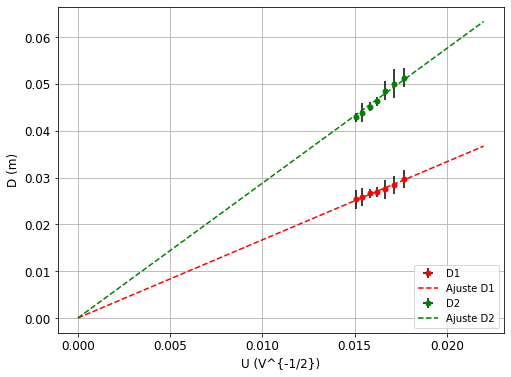

In [40]:
#Gráfica de U vs D1
plt.figure(figsize=(8, 6))
plt.errorbar(x_data(data["U(kV)"]), y_data(data["D1 (mm)"]), yerr=ΔD1/1000, xerr=0, fmt="o", mec='red', mfc='red', ecolor= "black", ms= "5", label = "D1")
plt.errorbar(Ua, ya(Ua, params1[0]), color="r", fmt='--', label = "Ajuste D1")
plt.errorbar(x_data(data["U(kV)"]), y_data(data["D2 (mm)"]), yerr=ΔD2/1000, xerr=0, fmt="o", mec='g', mfc='g', ecolor= "black", ms= "5", label = "D2")
plt.errorbar(Ua, ya(Ua, params2[0]), color="g", fmt='--', label = "Ajuste D2")
plt.ylabel("D (m)", size = 'large') 
plt.yticks(size = 'large')
plt.xlabel("U (V^{-1/2})", size = 'large') 
plt.xticks(size = 'large')
plt.legend(loc="lower right")
plt.grid(True) 
plt.savefig("D vs U")

2. Realice una regresión lineal, teniendo en cuenta que la recta debe pasar por el punto (0,0). Según la ley de Bragg, ¿quá valor debería tomar la pendiente de esta gráfica? ¿cuál es la incertidumbre en esta pendiente?

In [34]:
x = x_data(data["U(kV)"]) #V
y1= y_data(data["D1 (mm)"]) #m
y2= y_data(data["D2 (mm)"]) #m
N = 7
a1= params1[0] #S.I.
a2= params2[0] #S.I.
b = 0

def inc_pendiente(x,y,N,a,b):
    S= sum((y-b-a*x)**2)
    return np.sqrt((S/(N-2))*sum(x**2)/(N*sum(x**2)-sum(x)**2))


Δa1= round(inc_pendiente(x,y1,N,a1,b),3)
Δa2= round(inc_pendiente(x,y2,N,a2,b),3)

print('a1 = ' + str(a1))
print('Δa1= ' + str(Δa1))
print('a2= ' + str(a2))
print('Δa2= ' + str(Δa2))

a1 = 1.6681052490902821
Δa1= 0.002
a2= 2.8787242670815036
Δa2= 0.004


In [35]:
a1a= round(a1,3) #Pendiente 1 con incertidumbre
a2a= round(a2,3) #Pendiente 2 con incertidumbre
a1a

1.668

3. Con la pendiente de la regresión lineal y suponiendo $λ_{Bragg}$ = $λ_{deBroglie}$ calcule las distancias $d_1$,$d_2$. Compare su resultado con los valores reportados en la literatura para el grafito.

In [36]:
d1e= 2*L*n*h/(a1a*np.sqrt(2*e*m))
d2e= 2*L*n*h/(a2a*np.sqrt(2*e*m))

(d1e*1e12, d2e*1e12) #pm

(198.52220166606722, 115.01737838798196)

In [37]:
Δd1e= (4*L*n*h/(np.sqrt(2*e*m)*a1a**2))*Δa1
Δd2e= (4*L*n*h/(np.sqrt(2*e*m)*a2a**2))*Δa2

(round(Δd1e*1e12,1),round(Δd1e*1e12,1)) #pm

(0.5, 0.5)

4. Determine la constante de Planck con su respectiva incertidumbre. Puede usar la aproximación de ángulo pequeño donde lo considere necesario.

In [38]:
h_t1= np.sqrt(2*m*e*data["U(kV)"]*1000)*(2*d1/n)*np.sin(np.arctan(D1/(2*L*1000))/2)
h_t2= np.sqrt(2*m*e*data["U(kV)"]*1000)*(2*d2/n)*np.sin(np.arctan(D2/(2*L*1000))/2)

print(np.mean(h_t1))
print(np.mean(h_t2))

7.0758000893999415e-34
6.997676516542562e-34


In [39]:
datos1= h_t1
mean1 = np.mean(h_t1)
datos2= h_t2
mean2 = np.mean(h_t2)

σ1= np.sqrt(sum((datos1-mean1)**2)/(7-1))
σ2= np.sqrt(sum((datos2-mean2)**2)/(7-1))

(σ1/np.sqrt(7), σ2/np.sqrt(7))

(5.1973613592009234e-36, 3.365254727754008e-36)